# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

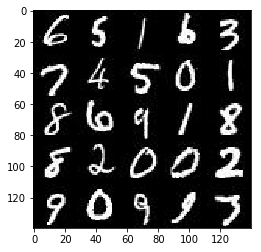

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

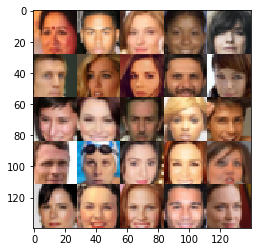

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image = tf.placeholder(tf.float32,[None, image_width, image_height, image_channels],name='input_real')
    Z = tf.placeholder(tf.float32, [None, z_dim],name='input_z')
    l_rate = tf.placeholder(tf.float32)

    return image, Z, l_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # input image is 28*28*3
        x1 = tf.layers.conv2d(images, 128, 5, strides=1,padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        # 28*28*128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 14*14*256
         
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 14*14*512
        
        x4 = tf.layers.conv2d(relu3, 1024, 5, strides=2, padding='same',
                             kernel_initializer = tf.contrib.layers.xavier_initializer())
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu5 = tf.maximum(alpha * bn4, bn4)
        # 7*7*1024
        
        # dropout
        dropout = tf.nn.dropout(relu5, 0.8)
        
        #leaky Relu
        flat = tf.reshape(dropout, (-1, 7*7*1024))
        logits = tf.layers.dense(flat,1,activation=None)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse= not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*1024)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x1024 now
        
        x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x512 now
        
        x3 = tf.layers.conv2d_transpose(x2, 512, 5, strides=2, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x512 now
        
        x4 = tf.layers.conv2d_transpose(x3, 256, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 14x14x256
        
        x5 = tf.layers.conv2d_transpose(x4, 128, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        # 14x14x128
        
        x6 = tf.layers.conv2d_transpose(x5, 64, 5, strides=1, padding='same',
                                       kernel_initializer = tf.contrib.layers.xavier_initializer())
        x6 = tf.layers.batch_normalization(x6, training=is_train)
        x6 = tf.maximum(alpha * x6, x6)
        # 14x14x64
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x6, out_channel_dim, 5, strides=2, padding='same',
                                           kernel_initializer = tf.contrib.layers.xavier_initializer())
        # 28x28x3 now
        
        # dropout
        dropout = tf.nn.dropout(logits, 0.5)
        
        out = tf.tanh(logits)
        
        return out 
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    alpha = 0.2
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
import sklearn.preprocessing
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    class GAN:
        def __init__(self, data_shape, z_dim, learning_rate):
        
            self.input_real, self.input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
            self.d_loss, self.g_loss = model_loss(self.input_real, self.input_z,
                                              data_shape[3])
        
            self.d_opt, self.g_opt = model_opt(self.d_loss, self.g_loss, learning_rate, beta1)
    

    net = GAN(data_shape, z_dim, learning_rate)

    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps = steps + 1
                #print(batch_images.shape)
                
                # normalize
                bachr_images = batch_images*2
                    
                
                # TODO: Train Model
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(net.d_opt, feed_dict={net.input_real: batch_images, net.input_z: batch_z})
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})
                
                _ = sess.run(net.g_opt, feed_dict={net.input_z: batch_z, net.input_real: batch_images})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = net.d_loss.eval({net.input_z: batch_z, net.input_real: batch_images})
                    train_loss_g = net.g_loss.eval({net.input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    

                if steps % 100 == 0:
                    show_generator_output(sess, 25, net.input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.1713... Generator Loss: 28.7931
Epoch 1/2... Discriminator Loss: 12.6330... Generator Loss: 8.3964
Epoch 1/2... Discriminator Loss: 4.2596... Generator Loss: 5.8927
Epoch 1/2... Discriminator Loss: 0.4670... Generator Loss: 5.0913
Epoch 1/2... Discriminator Loss: 3.2269... Generator Loss: 7.7495
Epoch 1/2... Discriminator Loss: 1.7167... Generator Loss: 1.1510
Epoch 1/2... Discriminator Loss: 1.4422... Generator Loss: 0.8236
Epoch 1/2... Discriminator Loss: 1.7790... Generator Loss: 0.3220
Epoch 1/2... Discriminator Loss: 2.5142... Generator Loss: 0.4909
Epoch 1/2... Discriminator Loss: 1.0366... Generator Loss: 2.5826


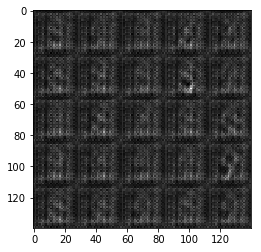

Epoch 1/2... Discriminator Loss: 1.3131... Generator Loss: 2.0547
Epoch 1/2... Discriminator Loss: 2.7898... Generator Loss: 0.1175
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 0.7205
Epoch 1/2... Discriminator Loss: 4.1385... Generator Loss: 11.6608
Epoch 1/2... Discriminator Loss: 1.2338... Generator Loss: 0.7446
Epoch 1/2... Discriminator Loss: 0.7994... Generator Loss: 2.8485
Epoch 1/2... Discriminator Loss: 2.7261... Generator Loss: 0.1186
Epoch 1/2... Discriminator Loss: 0.2142... Generator Loss: 5.2436
Epoch 1/2... Discriminator Loss: 2.1267... Generator Loss: 0.2321
Epoch 1/2... Discriminator Loss: 0.9782... Generator Loss: 2.9891


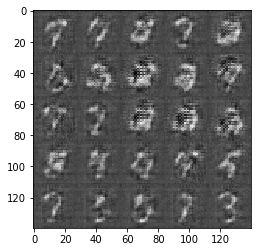

Epoch 1/2... Discriminator Loss: 0.2025... Generator Loss: 2.4065
Epoch 1/2... Discriminator Loss: 0.0188... Generator Loss: 4.4697
Epoch 1/2... Discriminator Loss: 0.0367... Generator Loss: 5.1644
Epoch 1/2... Discriminator Loss: 0.0762... Generator Loss: 3.5517
Epoch 1/2... Discriminator Loss: 1.0231... Generator Loss: 0.6302
Epoch 1/2... Discriminator Loss: 1.8217... Generator Loss: 0.4352
Epoch 1/2... Discriminator Loss: 2.5199... Generator Loss: 0.6108
Epoch 1/2... Discriminator Loss: 2.1017... Generator Loss: 0.4084
Epoch 1/2... Discriminator Loss: 1.7343... Generator Loss: 0.2680
Epoch 1/2... Discriminator Loss: 1.8276... Generator Loss: 2.0846


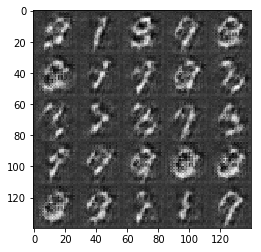

Epoch 1/2... Discriminator Loss: 1.0090... Generator Loss: 0.7279
Epoch 1/2... Discriminator Loss: 1.1977... Generator Loss: 2.4690
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 2.4077
Epoch 1/2... Discriminator Loss: 1.6746... Generator Loss: 2.5609
Epoch 1/2... Discriminator Loss: 1.1557... Generator Loss: 2.4183
Epoch 1/2... Discriminator Loss: 1.0936... Generator Loss: 1.8358
Epoch 1/2... Discriminator Loss: 1.5179... Generator Loss: 2.2478
Epoch 1/2... Discriminator Loss: 0.6865... Generator Loss: 2.6901
Epoch 1/2... Discriminator Loss: 1.7095... Generator Loss: 1.8533
Epoch 1/2... Discriminator Loss: 1.3687... Generator Loss: 0.4282


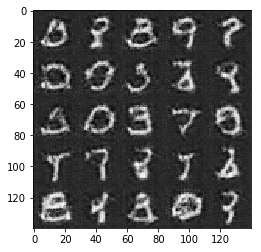

Epoch 1/2... Discriminator Loss: 1.2349... Generator Loss: 0.9430
Epoch 1/2... Discriminator Loss: 0.6367... Generator Loss: 2.4558
Epoch 1/2... Discriminator Loss: 1.6801... Generator Loss: 0.3194
Epoch 1/2... Discriminator Loss: 0.9353... Generator Loss: 0.6712
Epoch 1/2... Discriminator Loss: 4.0104... Generator Loss: 0.0467
Epoch 1/2... Discriminator Loss: 1.6892... Generator Loss: 0.2708
Epoch 1/2... Discriminator Loss: 1.1860... Generator Loss: 1.9673
Epoch 1/2... Discriminator Loss: 1.2594... Generator Loss: 0.4831
Epoch 1/2... Discriminator Loss: 2.0826... Generator Loss: 0.2015
Epoch 1/2... Discriminator Loss: 0.3070... Generator Loss: 2.5557


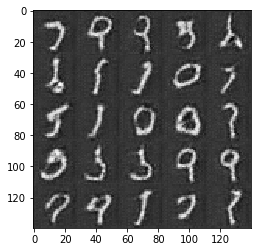

Epoch 1/2... Discriminator Loss: 0.2204... Generator Loss: 2.1526
Epoch 1/2... Discriminator Loss: 0.4746... Generator Loss: 1.1940
Epoch 1/2... Discriminator Loss: 3.4996... Generator Loss: 0.1106
Epoch 1/2... Discriminator Loss: 1.0137... Generator Loss: 0.7087
Epoch 1/2... Discriminator Loss: 2.1979... Generator Loss: 0.3637
Epoch 1/2... Discriminator Loss: 2.0075... Generator Loss: 0.2064
Epoch 1/2... Discriminator Loss: 0.6877... Generator Loss: 0.8898
Epoch 1/2... Discriminator Loss: 2.0080... Generator Loss: 0.2013
Epoch 1/2... Discriminator Loss: 0.5280... Generator Loss: 1.2558
Epoch 1/2... Discriminator Loss: 0.2809... Generator Loss: 2.0141


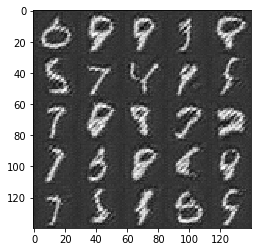

Epoch 1/2... Discriminator Loss: 0.0524... Generator Loss: 3.9808
Epoch 1/2... Discriminator Loss: 0.0358... Generator Loss: 4.1858
Epoch 1/2... Discriminator Loss: 4.3713... Generator Loss: 4.1963
Epoch 1/2... Discriminator Loss: 1.3678... Generator Loss: 0.8279
Epoch 1/2... Discriminator Loss: 1.6028... Generator Loss: 1.1296
Epoch 1/2... Discriminator Loss: 1.5933... Generator Loss: 1.8908
Epoch 1/2... Discriminator Loss: 1.0177... Generator Loss: 1.1788
Epoch 1/2... Discriminator Loss: 1.7682... Generator Loss: 2.1778
Epoch 1/2... Discriminator Loss: 1.7152... Generator Loss: 0.2491
Epoch 1/2... Discriminator Loss: 1.5397... Generator Loss: 0.3438


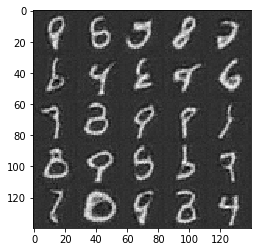

Epoch 1/2... Discriminator Loss: 1.5031... Generator Loss: 0.6174
Epoch 1/2... Discriminator Loss: 1.1400... Generator Loss: 2.2375
Epoch 1/2... Discriminator Loss: 1.3444... Generator Loss: 0.4200
Epoch 1/2... Discriminator Loss: 2.6544... Generator Loss: 2.9897
Epoch 1/2... Discriminator Loss: 1.7041... Generator Loss: 0.3119
Epoch 1/2... Discriminator Loss: 0.9031... Generator Loss: 0.7944
Epoch 1/2... Discriminator Loss: 1.2504... Generator Loss: 0.5516
Epoch 1/2... Discriminator Loss: 1.4394... Generator Loss: 0.6706
Epoch 1/2... Discriminator Loss: 0.7116... Generator Loss: 3.4067
Epoch 1/2... Discriminator Loss: 0.0661... Generator Loss: 4.4929


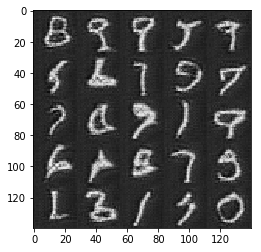

Epoch 1/2... Discriminator Loss: 0.2122... Generator Loss: 5.0918
Epoch 1/2... Discriminator Loss: 3.5171... Generator Loss: 0.0701
Epoch 1/2... Discriminator Loss: 1.2139... Generator Loss: 0.5727
Epoch 1/2... Discriminator Loss: 1.0335... Generator Loss: 0.5849
Epoch 1/2... Discriminator Loss: 1.3376... Generator Loss: 1.0408
Epoch 1/2... Discriminator Loss: 1.3239... Generator Loss: 0.9076
Epoch 1/2... Discriminator Loss: 1.5147... Generator Loss: 0.3326
Epoch 1/2... Discriminator Loss: 2.0836... Generator Loss: 4.8376
Epoch 1/2... Discriminator Loss: 2.0356... Generator Loss: 1.0189
Epoch 1/2... Discriminator Loss: 1.7084... Generator Loss: 0.7714


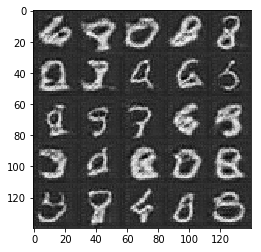

Epoch 1/2... Discriminator Loss: 1.4539... Generator Loss: 0.5796
Epoch 1/2... Discriminator Loss: 1.4448... Generator Loss: 1.6159
Epoch 1/2... Discriminator Loss: 1.4461... Generator Loss: 1.8842
Epoch 2/2... Discriminator Loss: 1.3829... Generator Loss: 2.0936
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.4685
Epoch 2/2... Discriminator Loss: 1.6552... Generator Loss: 1.4437
Epoch 2/2... Discriminator Loss: 0.7685... Generator Loss: 2.0418
Epoch 2/2... Discriminator Loss: 2.5229... Generator Loss: 0.1112
Epoch 2/2... Discriminator Loss: 1.8070... Generator Loss: 0.3083
Epoch 2/2... Discriminator Loss: 1.6565... Generator Loss: 0.2999


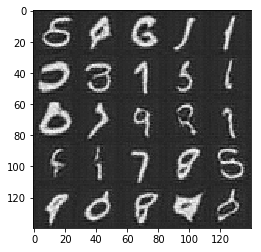

Epoch 2/2... Discriminator Loss: 1.1876... Generator Loss: 0.7473
Epoch 2/2... Discriminator Loss: 0.5057... Generator Loss: 3.1388
Epoch 2/2... Discriminator Loss: 2.0567... Generator Loss: 0.2022
Epoch 2/2... Discriminator Loss: 0.9475... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 2.3712... Generator Loss: 2.2415
Epoch 2/2... Discriminator Loss: 1.5288... Generator Loss: 0.3435
Epoch 2/2... Discriminator Loss: 0.1316... Generator Loss: 3.4869
Epoch 2/2... Discriminator Loss: 2.0985... Generator Loss: 0.4218
Epoch 2/2... Discriminator Loss: 1.1409... Generator Loss: 1.1032
Epoch 2/2... Discriminator Loss: 2.2337... Generator Loss: 0.1587


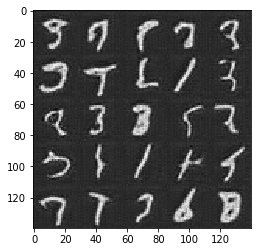

Epoch 2/2... Discriminator Loss: 0.8694... Generator Loss: 0.7154
Epoch 2/2... Discriminator Loss: 1.1368... Generator Loss: 0.5331
Epoch 2/2... Discriminator Loss: 0.4352... Generator Loss: 1.3882
Epoch 2/2... Discriminator Loss: 2.5363... Generator Loss: 0.1612
Epoch 2/2... Discriminator Loss: 1.6196... Generator Loss: 1.8100
Epoch 2/2... Discriminator Loss: 1.3811... Generator Loss: 1.3906
Epoch 2/2... Discriminator Loss: 1.6101... Generator Loss: 0.3564
Epoch 2/2... Discriminator Loss: 1.6333... Generator Loss: 0.3541
Epoch 2/2... Discriminator Loss: 1.2885... Generator Loss: 0.8941
Epoch 2/2... Discriminator Loss: 1.7689... Generator Loss: 0.2797


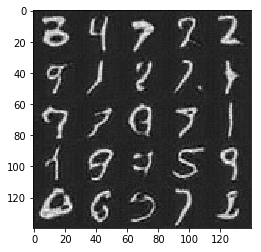

Epoch 2/2... Discriminator Loss: 1.5952... Generator Loss: 0.2908
Epoch 2/2... Discriminator Loss: 1.6899... Generator Loss: 6.4511
Epoch 2/2... Discriminator Loss: 1.8245... Generator Loss: 0.2123
Epoch 2/2... Discriminator Loss: 0.9684... Generator Loss: 0.6385
Epoch 2/2... Discriminator Loss: 0.2829... Generator Loss: 2.0910
Epoch 2/2... Discriminator Loss: 3.6934... Generator Loss: 1.9625
Epoch 2/2... Discriminator Loss: 1.7726... Generator Loss: 0.2697
Epoch 2/2... Discriminator Loss: 0.5464... Generator Loss: 2.1088
Epoch 2/2... Discriminator Loss: 1.2315... Generator Loss: 0.4383
Epoch 2/2... Discriminator Loss: 2.1676... Generator Loss: 0.1791


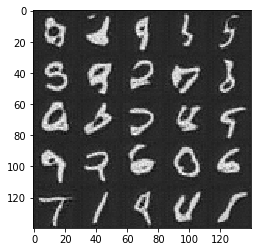

Epoch 2/2... Discriminator Loss: 1.3017... Generator Loss: 2.1263
Epoch 2/2... Discriminator Loss: 0.6588... Generator Loss: 1.1803
Epoch 2/2... Discriminator Loss: 2.3811... Generator Loss: 0.1650
Epoch 2/2... Discriminator Loss: 0.7227... Generator Loss: 4.3491
Epoch 2/2... Discriminator Loss: 0.2319... Generator Loss: 2.6395
Epoch 2/2... Discriminator Loss: 2.0236... Generator Loss: 3.4651
Epoch 2/2... Discriminator Loss: 2.1619... Generator Loss: 0.1996
Epoch 2/2... Discriminator Loss: 0.5065... Generator Loss: 2.8838
Epoch 2/2... Discriminator Loss: 1.7826... Generator Loss: 0.2627
Epoch 2/2... Discriminator Loss: 1.5198... Generator Loss: 2.3492


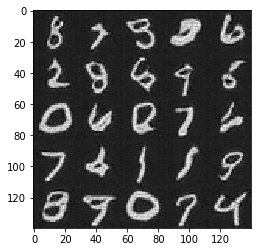

Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 2.9979
Epoch 2/2... Discriminator Loss: 1.3827... Generator Loss: 0.4282
Epoch 2/2... Discriminator Loss: 2.1930... Generator Loss: 0.2041
Epoch 2/2... Discriminator Loss: 0.9214... Generator Loss: 0.8552
Epoch 2/2... Discriminator Loss: 0.9246... Generator Loss: 0.8061
Epoch 2/2... Discriminator Loss: 1.5974... Generator Loss: 0.3935
Epoch 2/2... Discriminator Loss: 0.8941... Generator Loss: 2.2545
Epoch 2/2... Discriminator Loss: 1.6572... Generator Loss: 0.3160
Epoch 2/2... Discriminator Loss: 0.6092... Generator Loss: 1.0575
Epoch 2/2... Discriminator Loss: 1.1524... Generator Loss: 2.1100


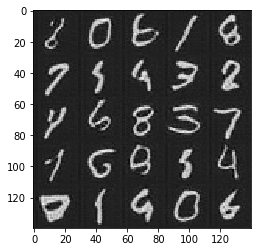

Epoch 2/2... Discriminator Loss: 2.0546... Generator Loss: 0.2161
Epoch 2/2... Discriminator Loss: 1.1217... Generator Loss: 0.9843
Epoch 2/2... Discriminator Loss: 2.0313... Generator Loss: 0.2155
Epoch 2/2... Discriminator Loss: 1.6068... Generator Loss: 0.4399
Epoch 2/2... Discriminator Loss: 2.4459... Generator Loss: 2.0470
Epoch 2/2... Discriminator Loss: 1.7078... Generator Loss: 0.3395
Epoch 2/2... Discriminator Loss: 1.5901... Generator Loss: 0.3812
Epoch 2/2... Discriminator Loss: 1.3855... Generator Loss: 0.5041
Epoch 2/2... Discriminator Loss: 1.7930... Generator Loss: 0.2790
Epoch 2/2... Discriminator Loss: 1.8575... Generator Loss: 0.2661


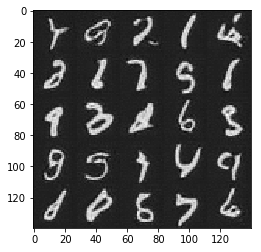

Epoch 2/2... Discriminator Loss: 2.8960... Generator Loss: 0.0940
Epoch 2/2... Discriminator Loss: 1.6536... Generator Loss: 0.3270
Epoch 2/2... Discriminator Loss: 0.7815... Generator Loss: 2.1853
Epoch 2/2... Discriminator Loss: 0.6763... Generator Loss: 4.4531
Epoch 2/2... Discriminator Loss: 1.2774... Generator Loss: 0.8115
Epoch 2/2... Discriminator Loss: 1.0952... Generator Loss: 1.3646
Epoch 2/2... Discriminator Loss: 2.6198... Generator Loss: 0.1196
Epoch 2/2... Discriminator Loss: 1.0870... Generator Loss: 1.4050
Epoch 2/2... Discriminator Loss: 0.9456... Generator Loss: 0.8816
Epoch 2/2... Discriminator Loss: 1.6585... Generator Loss: 1.4512


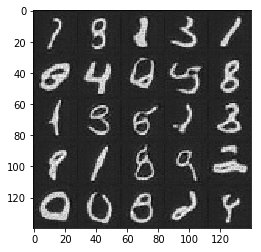

Epoch 2/2... Discriminator Loss: 2.4578... Generator Loss: 0.1291
Epoch 2/2... Discriminator Loss: 2.5068... Generator Loss: 0.1514
Epoch 2/2... Discriminator Loss: 1.8063... Generator Loss: 0.2524
Epoch 2/2... Discriminator Loss: 1.2169... Generator Loss: 3.4344
Epoch 2/2... Discriminator Loss: 2.1408... Generator Loss: 0.2072
Epoch 2/2... Discriminator Loss: 2.3681... Generator Loss: 0.1431
Epoch 2/2... Discriminator Loss: 1.0593... Generator Loss: 1.1469
Epoch 2/2... Discriminator Loss: 1.5890... Generator Loss: 0.3406
Epoch 2/2... Discriminator Loss: 2.1240... Generator Loss: 0.2297
Epoch 2/2... Discriminator Loss: 2.2982... Generator Loss: 0.1924


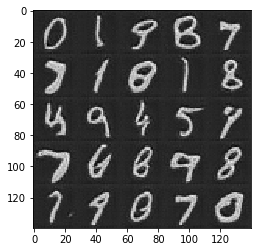

Epoch 2/2... Discriminator Loss: 1.4647... Generator Loss: 0.4428
Epoch 2/2... Discriminator Loss: 1.0795... Generator Loss: 0.8577
Epoch 2/2... Discriminator Loss: 1.5859... Generator Loss: 0.3285
Epoch 2/2... Discriminator Loss: 0.7097... Generator Loss: 0.9757
Epoch 2/2... Discriminator Loss: 2.5224... Generator Loss: 0.1326
Epoch 2/2... Discriminator Loss: 0.7950... Generator Loss: 1.3756
Epoch 2/2... Discriminator Loss: 1.0862... Generator Loss: 2.4396


In [12]:
batch_size = 64
z_dim = 100
learning_rate =  0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
        

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2560... Generator Loss: 8.6063
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 8.4539
Epoch 1/1... Discriminator Loss: 5.3029... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 8.7986... Generator Loss: 0.0019
Epoch 1/1... Discriminator Loss: 3.4726... Generator Loss: 0.0833
Epoch 1/1... Discriminator Loss: 2.5772... Generator Loss: 7.4776
Epoch 1/1... Discriminator Loss: 3.5138... Generator Loss: 0.3830
Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 0.8555
Epoch 1/1... Discriminator Loss: 1.7235... Generator Loss: 0.8774
Epoch 1/1... Discriminator Loss: 3.0555... Generator Loss: 0.1156


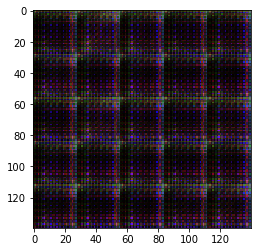

Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.4567
Epoch 1/1... Discriminator Loss: 2.1094... Generator Loss: 0.3000
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 1.2484
Epoch 1/1... Discriminator Loss: 1.6176... Generator Loss: 1.9039
Epoch 1/1... Discriminator Loss: 1.9771... Generator Loss: 0.2779
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 3.2286
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 3.7143
Epoch 1/1... Discriminator Loss: 1.6624... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.4903... Generator Loss: 0.5734


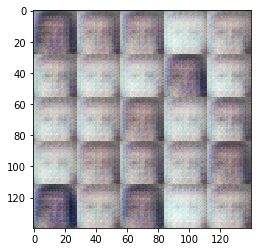

Epoch 1/1... Discriminator Loss: 1.6197... Generator Loss: 0.4662
Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 2.4171
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 2.7522
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.4417
Epoch 1/1... Discriminator Loss: 1.7432... Generator Loss: 0.3829
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 1.1484
Epoch 1/1... Discriminator Loss: 0.7164... Generator Loss: 1.7674
Epoch 1/1... Discriminator Loss: 0.7187... Generator Loss: 1.4988
Epoch 1/1... Discriminator Loss: 1.9682... Generator Loss: 2.7790


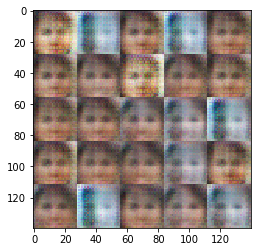

Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 0.8663
Epoch 1/1... Discriminator Loss: 0.5879... Generator Loss: 1.8396
Epoch 1/1... Discriminator Loss: 0.8166... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 0.6849... Generator Loss: 1.9803
Epoch 1/1... Discriminator Loss: 0.9842... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.4824... Generator Loss: 4.6464
Epoch 1/1... Discriminator Loss: 1.4625... Generator Loss: 0.4470
Epoch 1/1... Discriminator Loss: 0.3652... Generator Loss: 2.8863
Epoch 1/1... Discriminator Loss: 2.6645... Generator Loss: 0.1324
Epoch 1/1... Discriminator Loss: 1.1426... Generator Loss: 1.8353


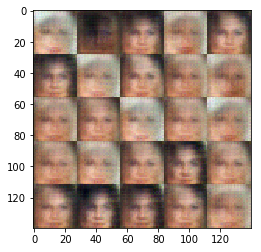

Epoch 1/1... Discriminator Loss: 0.5265... Generator Loss: 3.4175
Epoch 1/1... Discriminator Loss: 0.1937... Generator Loss: 3.7940
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 0.9971
Epoch 1/1... Discriminator Loss: 1.8141... Generator Loss: 4.4341
Epoch 1/1... Discriminator Loss: 0.3903... Generator Loss: 3.2055
Epoch 1/1... Discriminator Loss: 0.3260... Generator Loss: 1.9373
Epoch 1/1... Discriminator Loss: 0.0873... Generator Loss: 3.8638
Epoch 1/1... Discriminator Loss: 2.8683... Generator Loss: 4.6795
Epoch 1/1... Discriminator Loss: 1.5871... Generator Loss: 0.3585


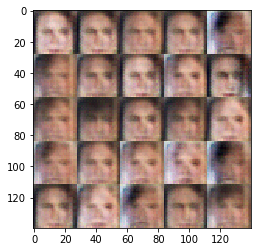

Epoch 1/1... Discriminator Loss: 0.2343... Generator Loss: 2.3507
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 4.5835
Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 1.4664
Epoch 1/1... Discriminator Loss: 0.0447... Generator Loss: 5.3602
Epoch 1/1... Discriminator Loss: 0.1142... Generator Loss: 2.6804
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 1.5927
Epoch 1/1... Discriminator Loss: 0.4650... Generator Loss: 1.6754
Epoch 1/1... Discriminator Loss: 0.2478... Generator Loss: 8.4863
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 8.3806
Epoch 1/1... Discriminator Loss: 0.0499... Generator Loss: 4.2411


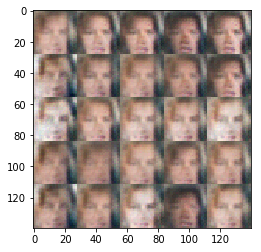

Epoch 1/1... Discriminator Loss: 1.8071... Generator Loss: 0.3288
Epoch 1/1... Discriminator Loss: 0.0892... Generator Loss: 5.5269
Epoch 1/1... Discriminator Loss: 0.1221... Generator Loss: 3.0376
Epoch 1/1... Discriminator Loss: 0.2704... Generator Loss: 1.7604
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 1.4740
Epoch 1/1... Discriminator Loss: 0.0711... Generator Loss: 3.0190
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 5.4756
Epoch 1/1... Discriminator Loss: 0.0374... Generator Loss: 4.9954
Epoch 1/1... Discriminator Loss: 0.0848... Generator Loss: 2.8169
Epoch 1/1... Discriminator Loss: 0.9314... Generator Loss: 0.6976


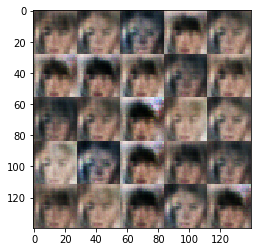

Epoch 1/1... Discriminator Loss: 0.0461... Generator Loss: 4.5152
Epoch 1/1... Discriminator Loss: 0.0385... Generator Loss: 6.0028
Epoch 1/1... Discriminator Loss: 0.0643... Generator Loss: 4.0986
Epoch 1/1... Discriminator Loss: 0.0894... Generator Loss: 2.9562
Epoch 1/1... Discriminator Loss: 0.0277... Generator Loss: 8.1191
Epoch 1/1... Discriminator Loss: 0.2501... Generator Loss: 1.7379
Epoch 1/1... Discriminator Loss: 0.0562... Generator Loss: 4.1522
Epoch 1/1... Discriminator Loss: 0.0668... Generator Loss: 4.0147
Epoch 1/1... Discriminator Loss: 0.1119... Generator Loss: 6.7781
Epoch 1/1... Discriminator Loss: 0.0206... Generator Loss: 7.9320


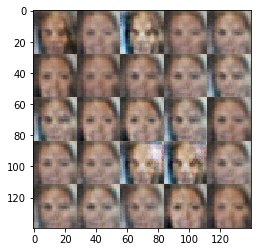

Epoch 1/1... Discriminator Loss: 1.8952... Generator Loss: 0.3784
Epoch 1/1... Discriminator Loss: 0.1499... Generator Loss: 2.6222
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.4147
Epoch 1/1... Discriminator Loss: 0.4359... Generator Loss: 1.3308
Epoch 1/1... Discriminator Loss: 0.0197... Generator Loss: 7.2760
Epoch 1/1... Discriminator Loss: 0.0155... Generator Loss: 6.8676
Epoch 1/1... Discriminator Loss: 0.0241... Generator Loss: 5.6351
Epoch 1/1... Discriminator Loss: 0.1100... Generator Loss: 8.6769
Epoch 1/1... Discriminator Loss: 0.0391... Generator Loss: 5.9938
Epoch 1/1... Discriminator Loss: 0.0780... Generator Loss: 3.0129


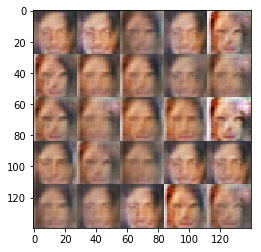

Epoch 1/1... Discriminator Loss: 0.0086... Generator Loss: 6.9177
Epoch 1/1... Discriminator Loss: 0.0295... Generator Loss: 4.1536
Epoch 1/1... Discriminator Loss: 0.0826... Generator Loss: 3.2280
Epoch 1/1... Discriminator Loss: 0.0304... Generator Loss: 4.0674
Epoch 1/1... Discriminator Loss: 0.1759... Generator Loss: 2.9188
Epoch 1/1... Discriminator Loss: 0.0444... Generator Loss: 4.9694
Epoch 1/1... Discriminator Loss: 0.0339... Generator Loss: 8.0642
Epoch 1/1... Discriminator Loss: 0.1583... Generator Loss: 2.3754
Epoch 1/1... Discriminator Loss: 1.9789... Generator Loss: 10.2394
Epoch 1/1... Discriminator Loss: 0.1345... Generator Loss: 3.4517


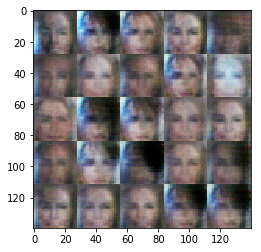

Epoch 1/1... Discriminator Loss: 2.3537... Generator Loss: 0.1329
Epoch 1/1... Discriminator Loss: 0.0304... Generator Loss: 7.8814
Epoch 1/1... Discriminator Loss: 2.2946... Generator Loss: 0.2534
Epoch 1/1... Discriminator Loss: 1.5384... Generator Loss: 0.3363
Epoch 1/1... Discriminator Loss: 0.1648... Generator Loss: 2.7712
Epoch 1/1... Discriminator Loss: 0.1530... Generator Loss: 8.0003
Epoch 1/1... Discriminator Loss: 0.1132... Generator Loss: 2.5008
Epoch 1/1... Discriminator Loss: 0.0204... Generator Loss: 7.0499
Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 1.3868
Epoch 1/1... Discriminator Loss: 0.0113... Generator Loss: 5.2154


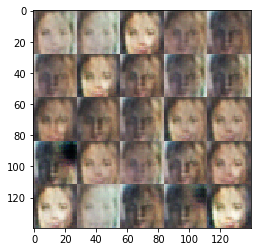

Epoch 1/1... Discriminator Loss: 0.0475... Generator Loss: 3.8343
Epoch 1/1... Discriminator Loss: 0.0226... Generator Loss: 10.0898
Epoch 1/1... Discriminator Loss: 0.0196... Generator Loss: 4.9625
Epoch 1/1... Discriminator Loss: 0.0653... Generator Loss: 3.6156
Epoch 1/1... Discriminator Loss: 0.0442... Generator Loss: 4.0054
Epoch 1/1... Discriminator Loss: 0.1210... Generator Loss: 2.5549
Epoch 1/1... Discriminator Loss: 0.0047... Generator Loss: 8.0415
Epoch 1/1... Discriminator Loss: 0.0306... Generator Loss: 5.3989
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 3.2652... Generator Loss: 0.0553


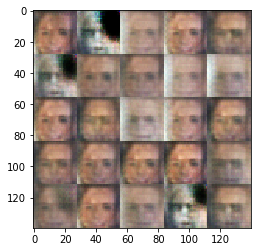

Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 3.5035
Epoch 1/1... Discriminator Loss: 0.4200... Generator Loss: 1.4342
Epoch 1/1... Discriminator Loss: 2.3569... Generator Loss: 0.1235
Epoch 1/1... Discriminator Loss: 0.0575... Generator Loss: 4.8611
Epoch 1/1... Discriminator Loss: 0.0851... Generator Loss: 3.4811
Epoch 1/1... Discriminator Loss: 0.2862... Generator Loss: 1.9619
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 7.4023
Epoch 1/1... Discriminator Loss: 0.0246... Generator Loss: 4.6718
Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 4.2911
Epoch 1/1... Discriminator Loss: 0.0201... Generator Loss: 4.9108


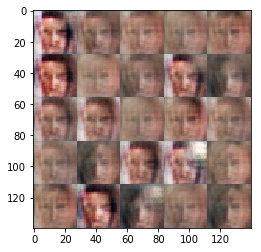

Epoch 1/1... Discriminator Loss: 0.0581... Generator Loss: 3.8060
Epoch 1/1... Discriminator Loss: 0.1951... Generator Loss: 1.8893
Epoch 1/1... Discriminator Loss: 0.0264... Generator Loss: 5.0346
Epoch 1/1... Discriminator Loss: 0.0114... Generator Loss: 8.7470
Epoch 1/1... Discriminator Loss: 0.0079... Generator Loss: 9.4070
Epoch 1/1... Discriminator Loss: 3.2193... Generator Loss: 12.0275
Epoch 1/1... Discriminator Loss: 0.0925... Generator Loss: 12.1158
Epoch 1/1... Discriminator Loss: 0.9105... Generator Loss: 2.0592
Epoch 1/1... Discriminator Loss: 0.0245... Generator Loss: 4.4506
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 8.1291


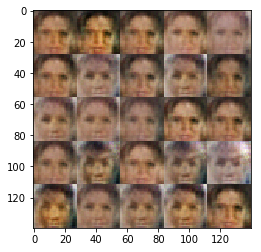

Epoch 1/1... Discriminator Loss: 0.0117... Generator Loss: 7.9125
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 8.8791
Epoch 1/1... Discriminator Loss: 0.0984... Generator Loss: 2.7215
Epoch 1/1... Discriminator Loss: 0.0405... Generator Loss: 10.9533
Epoch 1/1... Discriminator Loss: 0.0219... Generator Loss: 5.5333
Epoch 1/1... Discriminator Loss: 0.0479... Generator Loss: 4.0916
Epoch 1/1... Discriminator Loss: 0.0090... Generator Loss: 7.6993
Epoch 1/1... Discriminator Loss: 0.1090... Generator Loss: 9.6775
Epoch 1/1... Discriminator Loss: 0.0266... Generator Loss: 4.1615
Epoch 1/1... Discriminator Loss: 0.2461... Generator Loss: 2.3087


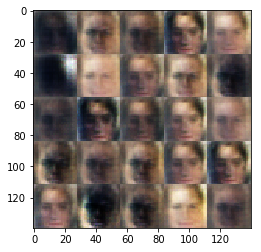

Epoch 1/1... Discriminator Loss: 0.2618... Generator Loss: 9.1426
Epoch 1/1... Discriminator Loss: 0.3846... Generator Loss: 1.4427
Epoch 1/1... Discriminator Loss: 0.0276... Generator Loss: 11.4110
Epoch 1/1... Discriminator Loss: 0.0092... Generator Loss: 5.6793
Epoch 1/1... Discriminator Loss: 0.3842... Generator Loss: 1.2144
Epoch 1/1... Discriminator Loss: 0.1647... Generator Loss: 8.1626
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 7.5489
Epoch 1/1... Discriminator Loss: 0.1045... Generator Loss: 2.8473
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 5.8740
Epoch 1/1... Discriminator Loss: 0.0161... Generator Loss: 7.9806


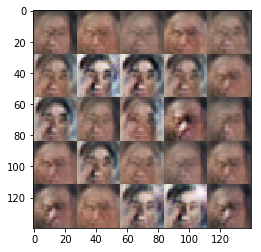

Epoch 1/1... Discriminator Loss: 0.0090... Generator Loss: 5.2857
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 8.1070
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 8.4396
Epoch 1/1... Discriminator Loss: 0.0135... Generator Loss: 9.9301
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.9701
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 4.5233
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 2.5418
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 8.1828
Epoch 1/1... Discriminator Loss: 0.0046... Generator Loss: 11.7413
Epoch 1/1... Discriminator Loss: 0.0234... Generator Loss: 9.0187


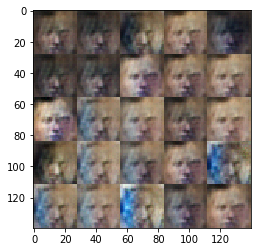

Epoch 1/1... Discriminator Loss: 0.0069... Generator Loss: 11.9544
Epoch 1/1... Discriminator Loss: 0.0305... Generator Loss: 6.6873
Epoch 1/1... Discriminator Loss: 10.8017... Generator Loss: 0.0015
Epoch 1/1... Discriminator Loss: 0.7331... Generator Loss: 0.9354
Epoch 1/1... Discriminator Loss: 0.0414... Generator Loss: 4.0366
Epoch 1/1... Discriminator Loss: 0.1022... Generator Loss: 6.8081
Epoch 1/1... Discriminator Loss: 0.6160... Generator Loss: 1.0349
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 7.3704
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 5.6013
Epoch 1/1... Discriminator Loss: 0.0265... Generator Loss: 11.4627


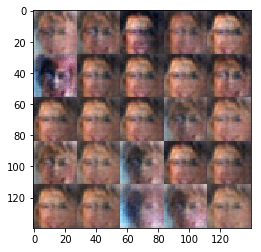

Epoch 1/1... Discriminator Loss: 0.0075... Generator Loss: 5.8916
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 5.1636
Epoch 1/1... Discriminator Loss: 0.0554... Generator Loss: 3.6255
Epoch 1/1... Discriminator Loss: 0.0228... Generator Loss: 4.0593
Epoch 1/1... Discriminator Loss: 0.0262... Generator Loss: 4.4258
Epoch 1/1... Discriminator Loss: 0.0276... Generator Loss: 4.1114
Epoch 1/1... Discriminator Loss: 0.0292... Generator Loss: 5.0076
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 11.1413
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 11.1040
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 8.8290


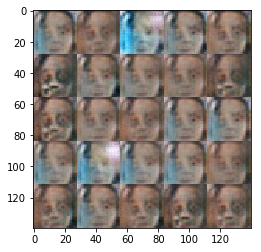

Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 6.9820
Epoch 1/1... Discriminator Loss: 0.0028... Generator Loss: 12.6242
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 5.8234
Epoch 1/1... Discriminator Loss: 0.0954... Generator Loss: 13.6451
Epoch 1/1... Discriminator Loss: 0.0048... Generator Loss: 11.8730
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 15.3358
Epoch 1/1... Discriminator Loss: 0.0120... Generator Loss: 15.3803
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 13.7535
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 12.4804
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 7.1906


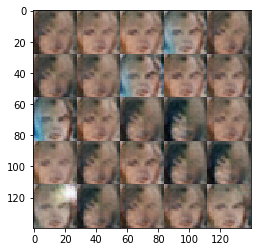

Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 8.3806
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 13.2677
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 8.8476
Epoch 1/1... Discriminator Loss: 0.0059... Generator Loss: 8.0867
Epoch 1/1... Discriminator Loss: 0.3970... Generator Loss: 4.5943
Epoch 1/1... Discriminator Loss: 0.1166... Generator Loss: 3.9375
Epoch 1/1... Discriminator Loss: 2.5680... Generator Loss: 0.1990
Epoch 1/1... Discriminator Loss: 0.2883... Generator Loss: 2.4059
Epoch 1/1... Discriminator Loss: 0.0455... Generator Loss: 3.4845
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 9.9709


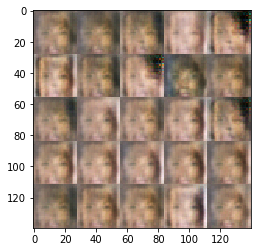

Epoch 1/1... Discriminator Loss: 1.8631... Generator Loss: 9.9457
Epoch 1/1... Discriminator Loss: 4.7652... Generator Loss: 9.7140
Epoch 1/1... Discriminator Loss: 0.0333... Generator Loss: 4.8303
Epoch 1/1... Discriminator Loss: 0.0317... Generator Loss: 4.4681
Epoch 1/1... Discriminator Loss: 0.1091... Generator Loss: 3.0859
Epoch 1/1... Discriminator Loss: 0.0636... Generator Loss: 5.5412
Epoch 1/1... Discriminator Loss: 0.0487... Generator Loss: 3.7616
Epoch 1/1... Discriminator Loss: 0.3712... Generator Loss: 1.6795
Epoch 1/1... Discriminator Loss: 0.1138... Generator Loss: 2.7037
Epoch 1/1... Discriminator Loss: 0.3778... Generator Loss: 1.5127


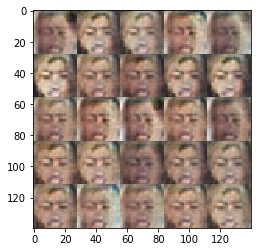

Epoch 1/1... Discriminator Loss: 0.0006... Generator Loss: 13.3784
Epoch 1/1... Discriminator Loss: 0.0779... Generator Loss: 2.9618
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 14.2085
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 8.6593
Epoch 1/1... Discriminator Loss: 0.5270... Generator Loss: 8.5351
Epoch 1/1... Discriminator Loss: 0.0297... Generator Loss: 5.8029
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 1.3297
Epoch 1/1... Discriminator Loss: 1.1271... Generator Loss: 9.5486
Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 10.5777
Epoch 1/1... Discriminator Loss: 0.2429... Generator Loss: 2.1205


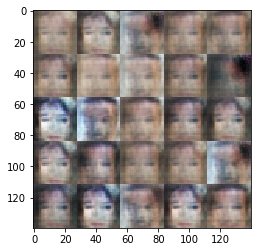

Epoch 1/1... Discriminator Loss: 0.0071... Generator Loss: 5.7496
Epoch 1/1... Discriminator Loss: 0.1419... Generator Loss: 4.3882
Epoch 1/1... Discriminator Loss: 0.2732... Generator Loss: 2.2785
Epoch 1/1... Discriminator Loss: 0.0040... Generator Loss: 6.5974
Epoch 1/1... Discriminator Loss: 0.2334... Generator Loss: 2.0172
Epoch 1/1... Discriminator Loss: 0.1067... Generator Loss: 3.1172
Epoch 1/1... Discriminator Loss: 2.6070... Generator Loss: 14.7303
Epoch 1/1... Discriminator Loss: 0.6094... Generator Loss: 1.0510
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 5.9660
Epoch 1/1... Discriminator Loss: 0.2300... Generator Loss: 8.9244


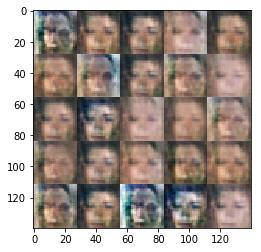

Epoch 1/1... Discriminator Loss: 0.0115... Generator Loss: 12.5361
Epoch 1/1... Discriminator Loss: 0.0148... Generator Loss: 5.2231
Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 5.2209
Epoch 1/1... Discriminator Loss: 0.0188... Generator Loss: 4.6349
Epoch 1/1... Discriminator Loss: 0.0055... Generator Loss: 6.2248
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 4.8354
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 5.2114
Epoch 1/1... Discriminator Loss: 0.0158... Generator Loss: 5.1345
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 7.9307
Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 11.3753


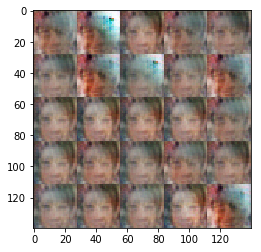

Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 4.0344
Epoch 1/1... Discriminator Loss: 0.0202... Generator Loss: 6.4100
Epoch 1/1... Discriminator Loss: 0.0624... Generator Loss: 3.2290
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 5.9125
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 10.3676
Epoch 1/1... Discriminator Loss: 0.0029... Generator Loss: 8.7117
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 10.2298
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 9.7529
Epoch 1/1... Discriminator Loss: 0.0268... Generator Loss: 4.6476
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 7.6672


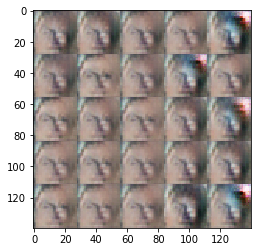

Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 9.3217
Epoch 1/1... Discriminator Loss: 0.0044... Generator Loss: 6.0888
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 6.6652
Epoch 1/1... Discriminator Loss: 0.0037... Generator Loss: 7.8776
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 4.7696
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 10.5677
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 11.0605
Epoch 1/1... Discriminator Loss: 0.0139... Generator Loss: 10.8468
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 8.4916
Epoch 1/1... Discriminator Loss: 0.0518... Generator Loss: 3.3755


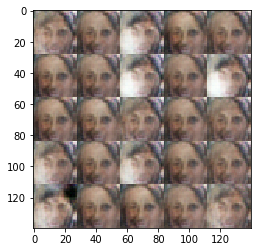

Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 7.7667
Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 6.1712
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 8.7800
Epoch 1/1... Discriminator Loss: 0.0059... Generator Loss: 5.6202
Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 10.2954
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 9.4135
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 11.9842
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 10.0498
Epoch 1/1... Discriminator Loss: 0.0106... Generator Loss: 5.0489
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 7.4252


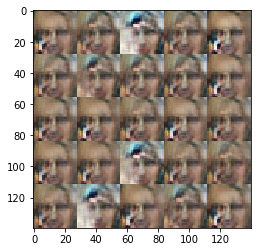

Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 9.8045
Epoch 1/1... Discriminator Loss: 0.1723... Generator Loss: 2.3140
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 18.1840
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 13.6754
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 9.9993
Epoch 1/1... Discriminator Loss: 0.0881... Generator Loss: 2.7509
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 10.1674
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 13.2849
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 12.4849
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 14.7553


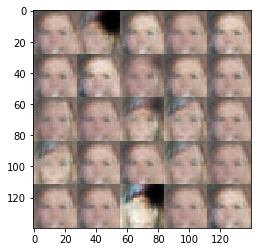

Epoch 1/1... Discriminator Loss: 0.0772... Generator Loss: 2.6744
Epoch 1/1... Discriminator Loss: 0.0426... Generator Loss: 15.7367
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 12.4620
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 13.3903
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 9.7208
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 7.2841
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 13.6309
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 12.3783
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 9.2521
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 9.5947


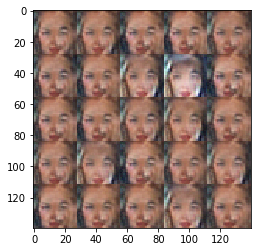

Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 12.9695
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 8.4834
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 9.9923
Epoch 1/1... Discriminator Loss: 0.0309... Generator Loss: 4.9732
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 5.7329
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 13.9879
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 15.3317
Epoch 1/1... Discriminator Loss: 2.3312... Generator Loss: 0.1978
Epoch 1/1... Discriminator Loss: 0.0893... Generator Loss: 3.1084
Epoch 1/1... Discriminator Loss: 0.1612... Generator Loss: 3.1349


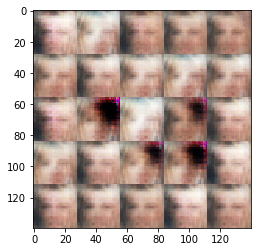

Epoch 1/1... Discriminator Loss: 0.1201... Generator Loss: 2.8325
Epoch 1/1... Discriminator Loss: 0.0738... Generator Loss: 3.3231
Epoch 1/1... Discriminator Loss: 0.0087... Generator Loss: 6.1480
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 8.0320
Epoch 1/1... Discriminator Loss: 2.2383... Generator Loss: 9.8381
Epoch 1/1... Discriminator Loss: 0.0788... Generator Loss: 4.8740


In [17]:
batch_size = 64
z_dim = 100
learning_rate = 0.00008
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.